# Exercício para sala de aula - Mapas auto-organizáveis

### **Introdução e objetivos:** 
Este notebook é um material complementar a disciplina de Aprendizado de Máquinas 2. O objetivo é reforçar os conteúdos da aula de mapas auto-organizáveis e trazer alguns aspectos práticos da implementação destes modelos. Vamos cobrir as etapas de treinamento, avaliação e utilização do modelo.

Como vimos em sala, os mapas auto-organizáveis podem ser utilizados para visualização de dados, redução de dimensionalidade e compressão (quantização). Neste exercício, vamos utilizar um mapa para visualização e redução de dimensionalidade de dados associados a liberdade econômica. O dataset contém 

### **Execução:** 
A execução deste notebook será feita através do Colab direto do Google Drive. Não existe impedimento para que este notebook seja executado em outro ambiente desde que os pacotes necessários estejam instalados corretamente.

### **Exercícios**

Exercício 1 - Dimensões dos nossos dados de entrada e saída e definição de hiperparâmetros

Exercício 2 - Treinamento do modelo

Exercício 3 - Utilização do modelo

Exercício 4 - Visualização dos dados

### Pacotes necessários

Para a execução deste exercício nós vamos precisar instalar o pacote Neupy e modificar a versão instalado do pacote xlrd

In [47]:
# Instalando o pacote
# http://neupy.com/apidocs/neupy.algorithms.competitive.sofm.html
!pip install neupy
!pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Pacotes necessários

Estes são os pacotes necessários. A documentação do algoritmo de mapas auto-organizáveis do Neupy se encontra em: http://neupy.com/apidocs/neupy.algorithms.competitive.sofm.html

In [48]:
# Importando os pacotes necessários
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from neupy import algorithms, utils
from sklearn.datasets import fetch_california_housing
pd.set_option('display.float_format', lambda x: '%.3f' % x)


Aluno : Caio Henrique Gonçalves Marques

utilizei o dataset de precificação de imoveis da california,

originalmente é um dataset de regressão, pórem a variável resposta foi categorizada em 10 grupos de espaçamento igual usando a função qcut do pandas

No final da atividade, pode-se ver que os grupos nao mantem a sua ordenação

In [49]:
# Importando Dataset do 

bunch = fetch_california_housing(as_frame = True)
dir(bunch)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [50]:
X = bunch.data
Y = bunch.target

In [51]:
Y

0       4.526
1       3.585
2       3.521
3       3.413
4       3.422
         ... 
20635   0.781
20636   0.771
20637   0.923
20638   0.847
20639   0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [52]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.325,41.000,6.984,1.024,322.000,2.556,37.880,-122.230
1,8.301,21.000,6.238,0.972,2401.000,2.110,37.860,-122.220
2,7.257,52.000,8.288,1.073,496.000,2.802,37.850,-122.240
3,5.643,52.000,5.817,1.073,558.000,2.548,37.850,-122.250
4,3.846,52.000,6.282,1.081,565.000,2.181,37.850,-122.250
...,...,...,...,...,...,...,...,...
20635,1.560,25.000,5.045,1.133,845.000,2.561,39.480,-121.090
20636,2.557,18.000,6.114,1.316,356.000,3.123,39.490,-121.210
20637,1.700,17.000,5.206,1.120,1007.000,2.326,39.430,-121.220
20638,1.867,18.000,5.330,1.172,741.000,2.123,39.430,-121.320


##### Exercício 1 - Hiperparâmetros

Vamos verificar quais as dimensões dos nossos dados de entrada e saída? Quais os hiperparâmetros devemos definir para o treinamento deste modelo? 

Recomenda-se consultar a documentação do SOM no neupy para entender o que cada parâmetro significa: http://neupy.com/apidocs/neupy.algorithms.competitive.sofm.html 

In [63]:
# Instanciando o algoritmo
grid_width = 4
grid_height = 2

sofm = algorithms.SOFM(
    n_inputs=8,
    learning_radius=0,
    step=0.1,
    shuffle_data=False,
    weight='init_pca',
    grid_type='rect',
    features_grid=(grid_width, grid_height)
    )

#### Exercício 2

O objetivo deste exercício é verificar como o número de iterações influência no treinamento do modelo. Além disso, é interessante verificar como os hiperparâmetros podem ser modificados e o impacto deles no resultado da medida de loss.

Faça outros experimentos com o número de neurônios diferente. E verifique como fica o loss nestes casos. Lembre-se que quanto maior o número de neurônios, maior a capacidade de representação.

In [64]:
# Executando o treinamento
sofm.train(X.values, epochs=100)

### Avaliação do modelo

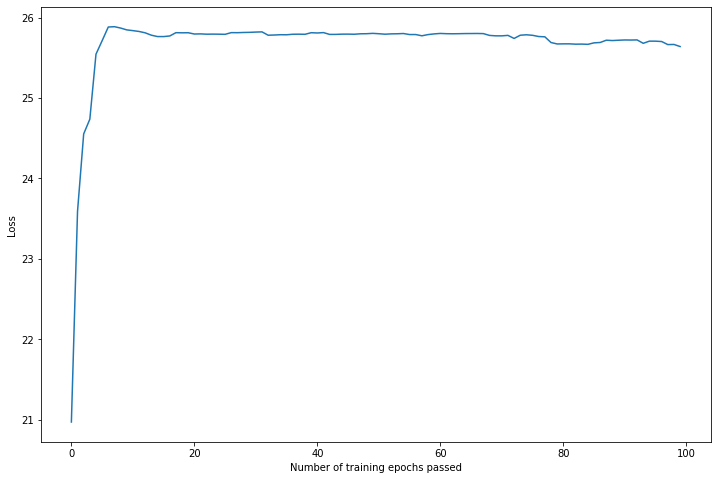

In [65]:
# Verificando o loss de treinamento
sofm.plot_errors()

In [66]:
# Verificando os pesos dos primeiros neurônios
sofm.weight.T[0:2]

array([[ 4.34795336e+00,  1.46781199e+01,  5.54797669e+00,
         1.05338417e+00,  6.56342982e+03,  3.34618183e+01,
         3.62805703e+01, -1.20307699e+02],
       [ 2.44436147e+00,  1.25403731e+01,  5.31624428e+00,
         1.03442210e+00,  3.22197659e+04,  6.12692982e+00,
         3.49507127e+01, -1.19546174e+02]])

#### Exercício 3 - Utilização do modelo

Vamos visualizar em qual neurônio cada país foi mapeado. A função predict nos retorna o número do neurônio associado a um determinado vetor (ou padrão de entrada). Com isso, conseguimos verificar quais países estão associados à um determinado neurônio.

Podemos analisar também quão bem um determinado neurônio foi representado, comparando o vetor de pesos do neurônio e o padrão de entrada da rede.

Faça o predict para um subconjunto de países e verifique os neurônios aos quais ele foi mapeado.

Quão bem o Brasil foi representado? Verifique os dados de entrada do Brasil e os pesos associados ao neurônio correspondente

#### Exercício 4 - Visualização dos dados

A visualização dos dados pode ser feita em um grid bidimensional, independente das dimensões dos dados de entrada. Neste caso, os dados de entrada para treinamento do modelo tem 12 dimensões (12 features selecionadas no dataset). 

In [67]:
# Criando o posicionamento dos neurônios no grid
neuron_number = 0
grid_map = []

for y in range(grid_height):
  for x in range(grid_width):
    grid_map.append([neuron_number, x, y])
    neuron_number += 1

df_neuron = pd.DataFrame(grid_map, columns=['Neuron','x','y'])


In [69]:
# Fazendo a predição para todo o dataset
result_all = sofm.predict(X).argmax(axis=1)

# Unindo os dados dos neurônios aos dados categóricos
df_result = X.iloc[:,:5]
df_result['Neuron'] = pd.DataFrame(result_all)
df_result = pd.merge(df_result, df_neuron, on='Neuron', how='left')

# Inserindo as categorias
df_result['Classification'] = pd.qcut(Y,q = 10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Quais países foram atribuídos à um mesmo neurônio?

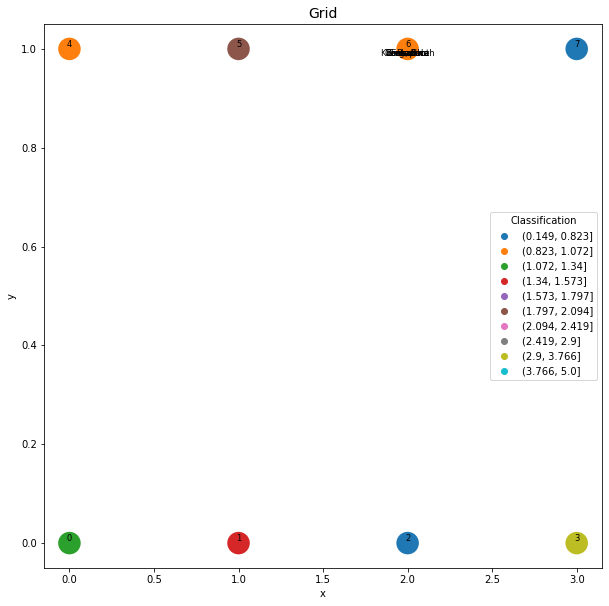

In [70]:
fig, ax = plt.subplots(figsize=(10, 10))

p1 = sns.scatterplot(x=df_result['x'],
                y=df_result['y'], 
                s=600,
                hue=df_result['Classification'])

# Plotando o nome de alguns países
for item in countries:
  country_print = df_result.iloc[:,:].values.tolist()
  p1.text(country_print[0][6],
          country_print[0][7],
          item,
          va='top',
          ha='center',
          size='smaller')
  
# Plotando o número do neurônio
neuron_group = df_result.groupby(['Neuron', 'x', 'y']).size().reset_index()
for item, val in enumerate(neuron_group['Neuron']):
  p1.text(neuron_group['x'][item],
          neuron_group['y'][item],
          neuron_group['Neuron'][item],
          va='bottom',
          ha='center',
          size='smaller')
  
  plt.title('Grid', size=14);